In [25]:
#pip install --upgrade pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime 

In [2]:
gs_data = pdr.get_data_fred('GS10')
gs_data.head()

,GS10
DATE,
2019-11-01,1.81
2019-12-01,1.86
2020-01-01,1.76
2020-02-01,1.50
2020-03-01,0.87


<Axes: xlabel='DATE'>

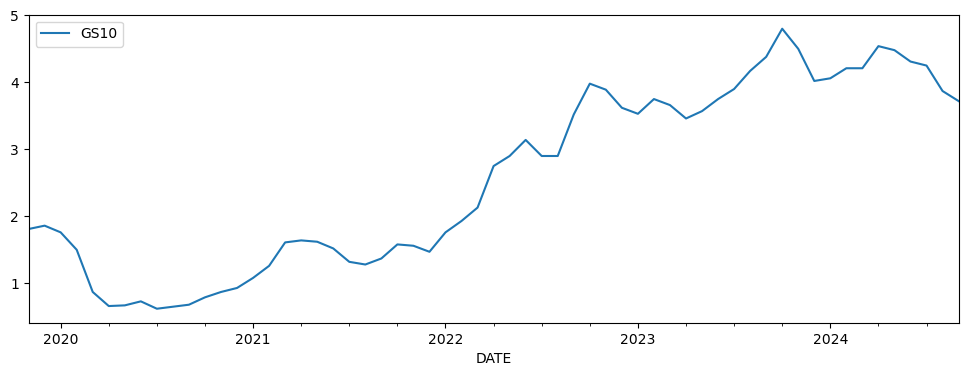

In [3]:
gs_data.plot(figsize=(12,4))

<Axes: xlabel='DATE'>

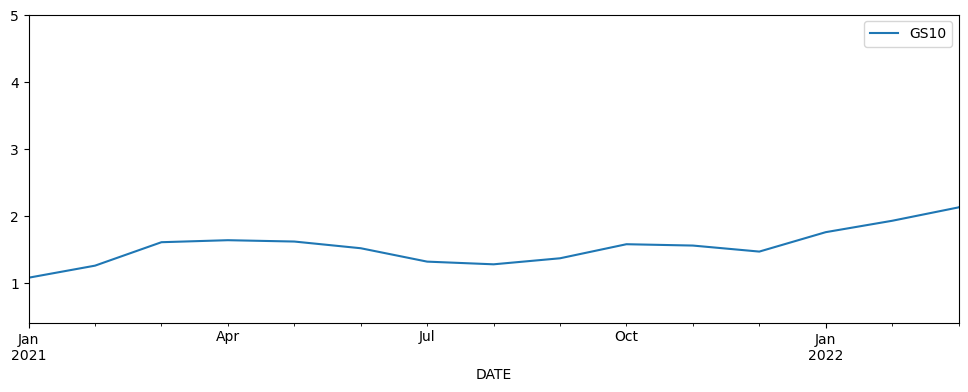

In [4]:
# x-limit and y-limit
gs_data.plot(xlim=['2021-01-20','2022-03-22'],figsize=(12,4))

<Axes: xlabel='DATE'>

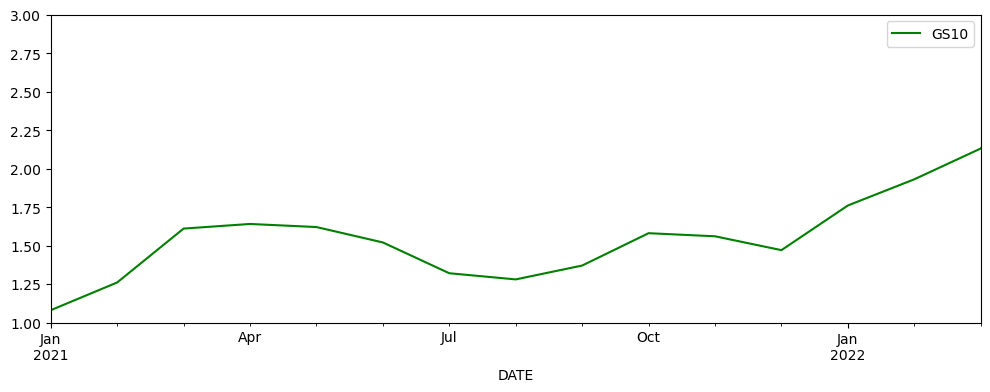

In [5]:
gs_data.plot(xlim=['2021-01-20','2022-03-22'],ylim=[1,3],figsize=(12,4),c='green')

In [6]:
gs_data.loc['2021-01-20':'2022-03-22'].index

DatetimeIndex(['2021-02-01', '2021-03-01', '2021-04-01', '2021-05-01',
               '2021-06-01', '2021-07-01', '2021-08-01', '2021-09-01',
               '2021-10-01', '2021-11-01', '2021-12-01', '2022-01-01',
               '2022-02-01', '2022-03-01'],
              dtype='datetime64[ns]', name='DATE', freq=None)

In [7]:
gs_data.loc['2021-01-20':'2022-03-22']["GS10"]

DATE
2021-02-01    1.26
2021-03-01    1.61
2021-04-01    1.64
2021-05-01    1.62
2021-06-01    1.52
2021-07-01    1.32
2021-08-01    1.28
2021-09-01    1.37
2021-10-01    1.58
2021-11-01    1.56
2021-12-01    1.47
2022-01-01    1.76
2022-02-01    1.93
2022-03-01    2.13
Name: GS10, dtype: float64

In [8]:
index = gs_data.index
gs_gs10 = gs_data["GS10"]

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

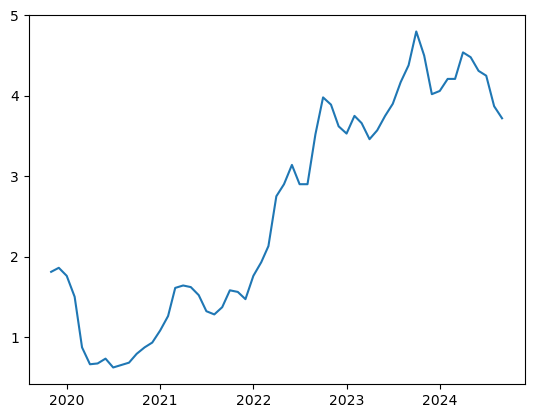

In [10]:
figure,axis=plt.subplots()
axis.plot(index,gs_gs10)

#### if the data of x-axis is overlapped
#### plt.tight_layout()
#### (or)
#### figure.autofmt_xdate()

## Time resampling

In [11]:
# to get the minimum in each year
gs_data.resample(rule='A').min()

,GS10
DATE,
2019-12-31,1.81
2020-12-31,0.62
2021-12-31,1.08
2022-12-31,1.76
2023-12-31,3.46
2024-12-31,3.72


In [12]:
# to get the maximum in each year
gs_data.resample(rule='A').max()

,GS10
DATE,
2019-12-31,1.86
2020-12-31,1.76
2021-12-31,1.64
2022-12-31,3.98
2023-12-31,4.80
2024-12-31,4.54


<Axes: xlabel='DATE'>

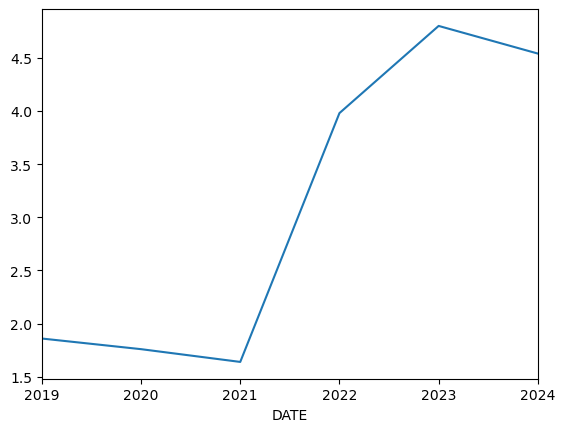

In [14]:
gs_data.resample(rule='A').max()['GS10'].plot()

In [15]:
# To get quaterly
gs_data.resample(rule="QS").max()

,GS10
DATE,
2019-10-01,1.86
2020-01-01,1.76
2020-04-01,0.73
2020-07-01,0.68
2020-10-01,0.93
2021-01-01,1.61
2021-04-01,1.64
2021-07-01,1.37
2021-10-01,1.58


<Axes: xlabel='DATE'>

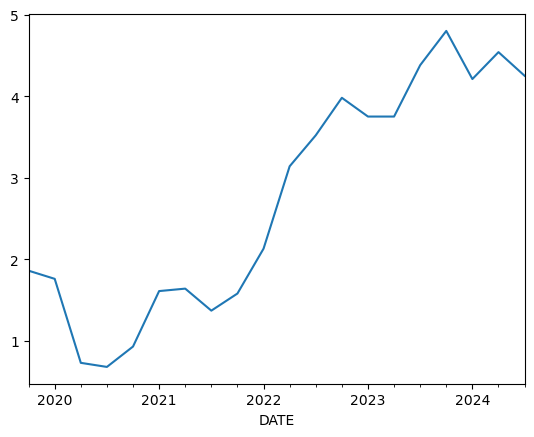

In [16]:
# To get quaterly plot
gs_data.resample(rule="QS").max()["GS10"].plot()

In [17]:
# Buissness and frequency
gs_data.resample(rule="BA").max()

,GS10
DATE,
2019-12-31,1.86
2020-12-31,1.76
2021-12-31,1.64
2022-12-30,3.98
2023-12-29,4.80
2024-12-31,4.54


In [18]:
# Buissness and frequency quaterly
gs_data.resample(rule="BQS").max()

,GS10
DATE,
2019-10-01,1.86
2020-01-01,1.76
2020-04-01,0.73
2020-07-01,0.68
2020-10-01,0.93
2021-01-01,1.61
2021-04-01,1.64
2021-07-01,1.37
2021-10-01,1.76


<Axes: xlabel='DATE'>

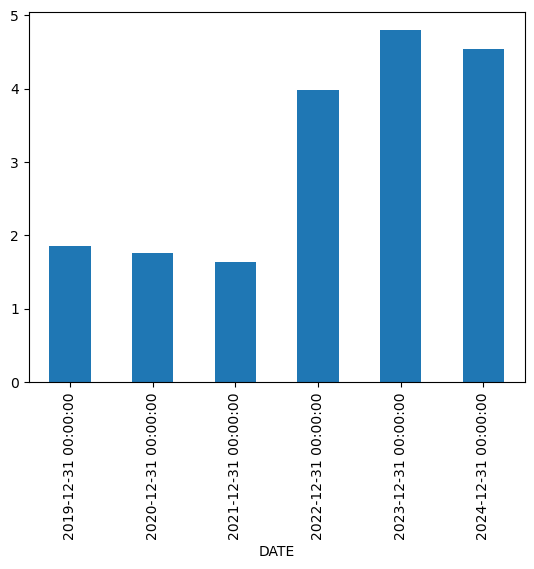

In [19]:
# can take a particular column also
gs_data["GS10"].resample(rule="A").max().plot(kind='bar')